# Taller 1. Introducción al procesamiento digital de imágenes

Iniciaremos con un paquete para el procesamiento de imágenes en python dentro del ecosistema de scipy/nump: [scikit-image](https://scikit-image.org/)

In [1]:
import skimage 
from skimage import data

import matplotlib.pyplot as plt
import os

### ¿Qué objeto es una imagen en scikit-image?

In [2]:
retina = data.retina()
type(retina)

numpy.ndarray

Las imágenes dentro de `scikit-image` son objetos dentro del ecosistema de `scipy` denominado `numpy.ndarray` lo que permite usar muchas de las características de `numpy` y otras especialmente añadidas para arreglos multidimensionales.

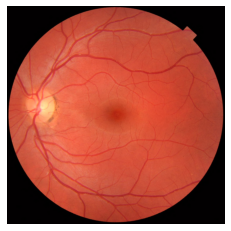

In [3]:
plt.imshow(retina)
plt.axis('off');

#### ¿Cuál es el tamaño de la imagen?

In [4]:
retina.shape

(1411, 1411, 3)

La imagen tiene una tamaño de 1411 * 1411 pixeles y tiene una dimensión añadida a las tres componentes de color. 

#### ¿Qué tipo de datos tiene la imagen?

In [5]:
retina.dtype

dtype('uint8')

En skimage, las imágenes son simplemente matrices numéricas, que admiten una variedad de tipos de datos ("dtypes"). Para evitar distorsionar la intensidad de la imagen  asumimos que las imágenes utilizan los siguientes tipos y rangos:

Data | type Range
------|----------
uint8| 0 to 255
uint16| 0 to 65535
uint32| 0 to 232 - 1
float| -1 to 1 or 0 to 1
int8| -128 to 127
int16| -32768 to 32767
int32| -231 to 231 - 1

### ¿Cómo extraemos las componentes de R,G,B?

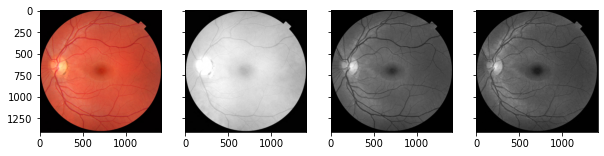

In [6]:
red = retina[:,:,0]
green = retina[:,:,1]
blue = retina[:,:,2]

f, ax = plt.subplots(1, 4, sharey=True, figsize=(10,10))
ax[0].imshow(retina)
ax[1].imshow(red, cmap='gray')
ax[2].imshow(green, cmap='gray')
ax[3].imshow(blue,cmap='gray')
plt.show()

### ¿Cómo leer una imagen?

In [7]:
from skimage import io

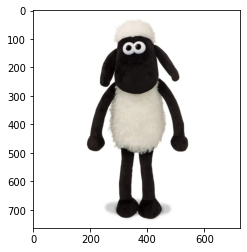

In [8]:
filename = "shaun.jpg"
shaun = io.imread(filename)

plt.imshow(shaun);

#### ¿Cúal es el color de la lana de la oveja?

In [9]:
shaun[400,400]

array([222, 213, 198], dtype=uint8)

#### ¿Cómo guardar una imagen?

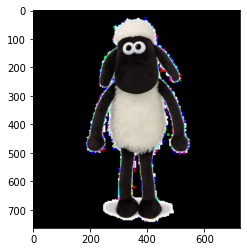

In [10]:
mask = shaun == shaun.max() # Crea una mascara binaria (en los tres canales)
shaun2 = shaun.copy() 
shaun2[mask] = 0 # Sustituye todo lo blanco por negro
plt.imshow(shaun2);
io.imsave("shaun_sin_fondo.jpg", shaun2)

## Ejercicios
Se debe entregar en el notebook al finalizar la clase (grupos de a 2)

In [11]:
import skimage 
from skimage import data
from skimage import io

import matplotlib.pyplot as plt
import os

### (1)
Cree una función que transforme una imagen de color a escala de grises, usando dos opciones:

a) el promedio de las componentes R, G y B

b) una transformación para calcular la componente de luma dada por $$Y=0.299R + 0.587G+0.114B$$
c) Convierta la imagen de `colorbar.png` de las dos formas. ¿Qué conversión resulta mejor? ¿Por qué?

## a) Average

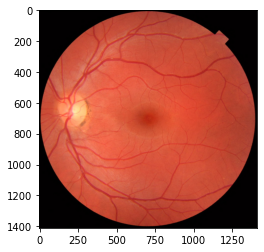

In [12]:
retina = data.retina()
plt.imshow(retina)

In [13]:
def grayScale_avg(retina):
    red = retina[:,:,0]
    green = retina[:,:,1]
    blue = retina[:,:,2]
    
    avg = (red + green + blue)/3
    
    return avg

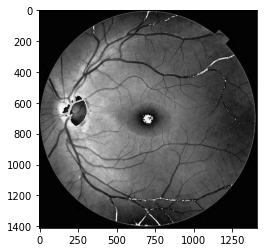

In [14]:
plt.imshow(grayScale_avg(retina), cmap='gray');

## b) Luma

In [15]:
retina = data.retina()

In [16]:
def grayScale_luma(retina):
    red = retina[:,:,0]
    green = retina[:,:,1]
    blue = retina[:,:,2]
    
    luma = 0.299*red + 0.587*green + 0.114*blue
    
    return luma

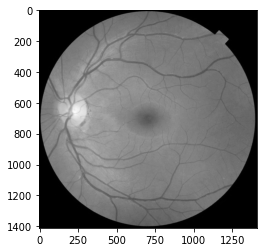

In [17]:
plt.imshow(grayScale_luma(retina), cmap='gray');

## c) colorbar.png

#### Average

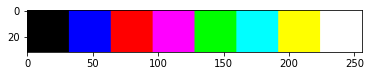

In [18]:
filename = "colorbar.png"
colorbar = io.imread(filename)

plt.imshow(colorbar);

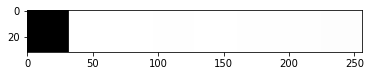

In [19]:
plt.imshow(grayScale_avg(colorbar), cmap='gray');

#### Luma

In [20]:
colorbar = io.imread(filename)

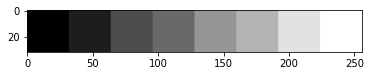

In [21]:
plt.imshow(grayScale_luma(colorbar), cmap='gray');

#### La conversión de Luma resulta mejor, principalmente es porque Luma es una componente de color que es más perceptible por los humanos.

### (2)    
(a) Escriba una función que añada un valor constante a cada pixel de la imagen sobre un  un canal específico (componente de color). La imagen debe convertirse al tipo `float` (usar `skimage.util.img_as_float`) y el valor añadido debe estar entre cero y uno. La siguiente celda muestra una plantilla de la función. 

## (a)

In [22]:
def desplazar_imagen(imagen, canal, v):
    """imagen: imagen a modificar
    canal: entero indicando el canal
    v: valor (float) en la que se desplaza el canal"""
    
    try:
        imagen_desplazada = skimage.util.img_as_float(imagen)
        imagen_desplazada[:,:,canal] = imagen_desplazada[:,:,canal] + v
        
    except IndexError:
        print("El canal debe ser 0 (red), 1 (green) o 2 (blue).")
    
    return imagen_desplazada 

(b) Pruebe la función anterior sobre esta [imagen](https://1.bp.blogspot.com/-JREhSKN8sMM/VmH2B-jmFXI/AAAAAAAAIzg/ScNtA185M88/s1600/02273%2Bpaisajes01.jpg) para diferentes valores de `v` y diferentes canales, mostrando los resultados (puede leer la imagen directamente con la URL).

(c) Modifique la función anterior para que cuando se sobrepase la imagen (por encima de 1) la sature en 1 (es decir, valores por encima de 1 son iguales 1). Repita la prueba en (b) con la función modificada. ¿Existen diferencias?

## (b)

In [23]:
img_view = io.imread("https://1.bp.blogspot.com/-JREhSKN8sMM/VmH2B-jmFXI/AAAAAAAAIzg/ScNtA185M88/s1600/02273%2Bpaisajes01.jpg")

new_img_view = desplazar_imagen(img_view, 2, 0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


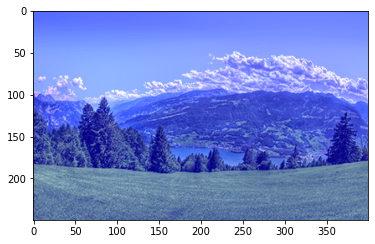

In [24]:
plt.imshow(new_img_view)

In [25]:
img_view = io.imread("https://1.bp.blogspot.com/-JREhSKN8sMM/VmH2B-jmFXI/AAAAAAAAIzg/ScNtA185M88/s1600/02273%2Bpaisajes01.jpg")

new_img_view = desplazar_imagen(img_view, 1, 0.7)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


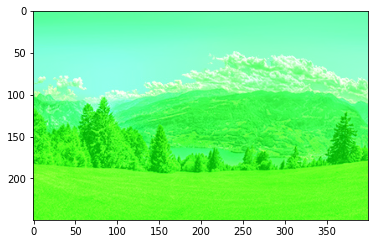

In [26]:
plt.imshow(new_img_view)

In [27]:
img_view = io.imread("https://1.bp.blogspot.com/-JREhSKN8sMM/VmH2B-jmFXI/AAAAAAAAIzg/ScNtA185M88/s1600/02273%2Bpaisajes01.jpg")

new_img_view = desplazar_imagen(img_view, 0, 0.3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


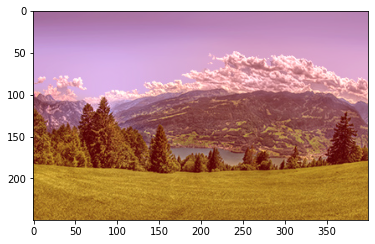

In [28]:
plt.imshow(new_img_view)

## (C)

In [29]:
def desplazar_imagen_new(imagen, canal, v):
    """imagen: imagen a modificar
    canal: entero indicando el canal
    v: valor (float) en la que se desplaza el canal"""
    
    try:
        imagen_desplazada = skimage.util.img_as_float(imagen)
        
        imagen_desplazada_bool = imagen_desplazada.copy() == -1
        imagen_desplazada_bool[:,:,canal] = (imagen_desplazada[:,:,canal] + v) > 1
        
        imagen_desplazada[:,:,canal] = imagen_desplazada[:,:,canal] + v
        imagen_desplazada[imagen_desplazada_bool] = 1
        
    except IndexError:
        print("El canal debe ser 0 (red), 1 (green) o 2 (blue).")
    
    return imagen_desplazada 

In [30]:
img_view = io.imread("https://1.bp.blogspot.com/-JREhSKN8sMM/VmH2B-jmFXI/AAAAAAAAIzg/ScNtA185M88/s1600/02273%2Bpaisajes01.jpg")

new_img_view = desplazar_imagen_new(img_view, 2, 0.5)

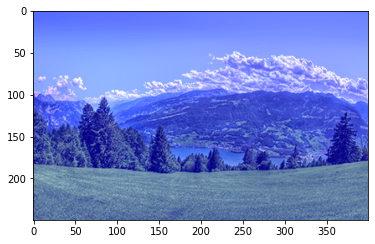

In [31]:
plt.imshow(new_img_view)

In [32]:
img_view = io.imread("https://1.bp.blogspot.com/-JREhSKN8sMM/VmH2B-jmFXI/AAAAAAAAIzg/ScNtA185M88/s1600/02273%2Bpaisajes01.jpg")

new_img_view = desplazar_imagen_new(img_view, 1, 0.7)

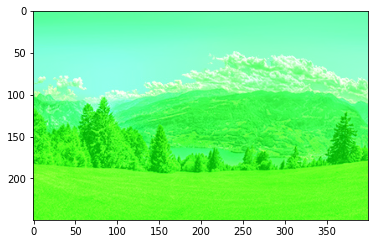

In [33]:
plt.imshow(new_img_view)

In [34]:
img_view = io.imread("https://1.bp.blogspot.com/-JREhSKN8sMM/VmH2B-jmFXI/AAAAAAAAIzg/ScNtA185M88/s1600/02273%2Bpaisajes01.jpg")

new_img_view = desplazar_imagen_new(img_view, 0, 0.3)

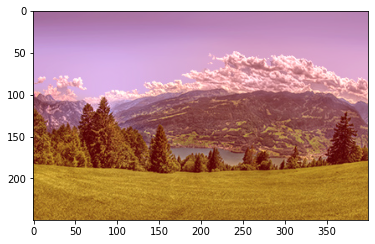

In [35]:
plt.imshow(new_img_view)

#### Visualmente no existen diferencias.

### (3) 
Cargue la imagen de ajedrez de la siguiente forma:

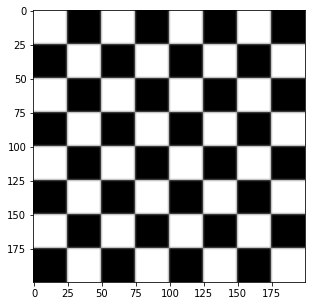

In [36]:
checkers = data.checkerboard()
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(checkers, cmap='gray');

(a) Produzca una mascara binaria que seleccione sólo las casillas blancas (debe ser `True` en las blancas. Tenga cuidado de que hay pixeles con niveles de grises.

In [37]:
checkers_mask_1 = checkers == checkers.max()

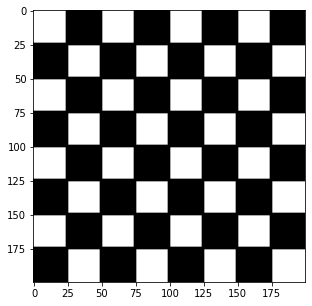

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(checkers_mask_1, cmap='gray')

(b) Ahora cree una máscara binaria (con el mismo tamaño de la imagen original) que incluya el cuadrado formado desde la tercera fila de casillas (de abajo hacia arriba) hasta la tercera columna de casillas (de izquierda a derecha).

In [39]:
checkers_mask_2 = checkers.copy() == 1
checkers_mask_2[0:200, 0:200] = False

In [40]:
checkers_mask_2[0:125, 75:200] = True

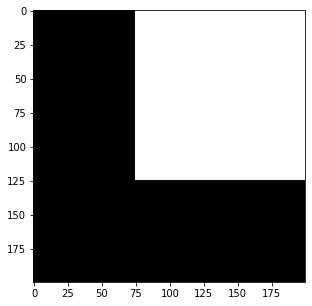

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(checkers_mask_2, cmap='gray')

(c) Determina la unión, intersección y diferencia entre las regiones generadas por (a) y (b)

#### Unión

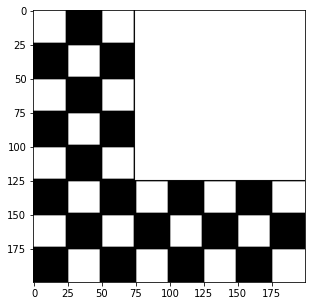

In [42]:
checkers_masks_union = checkers_mask_1 | checkers_mask_2

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(checkers_masks_union, cmap='gray')

#### Intersección

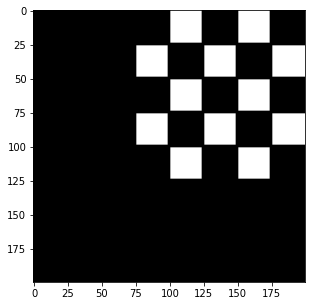

In [43]:
checkers_masks_inter = checkers_mask_1 & checkers_mask_2

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(checkers_masks_inter, cmap='gray')

#### Diferencia

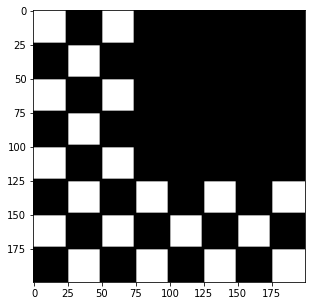

In [44]:
checkers_masks_diff = checkers_mask_1 & ~checkers_mask_2

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(checkers_masks_diff, cmap='gray')

### (4) 

(a) Tomese una foto con el celular. Cargue la imagen mediante `skimage.io.imread`. La imagen seguramente tendrá un tamaño grande. Reduzca el tamaño realizando un reescalamiento (use `skimage.transform.resize` o `skimage.transform.rescale)`) para tener una nueva imagen con una resolución menor a 1M pixel. Visualice sólo esta última imagen.


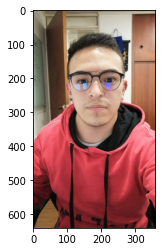

In [45]:
from skimage.transform import rescale, resize
import numpy as np

filename = "foto.jpeg"
nico = io.imread(filename)

size = (640, 360)
nico_resize = resize(nico, size)

plt.imshow(nico_resize);

(b) Convierta su imagen a escala de grises usando la función del punto (1).

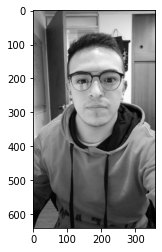

In [46]:
grayScale_avgN = nico_resize.copy()
grayScale_avgNico = grayScale_luma(grayScale_avgN)

plt.imshow(grayScale_avgNico, cmap='gray')

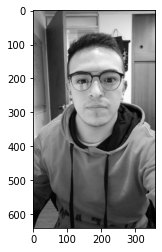

In [47]:
grayScale_lumaN = nico_resize.copy()
grayScale_lumaNico = grayScale_luma(grayScale_lumaN)

plt.imshow(grayScale_lumaNico, cmap='gray')

In [48]:
grayScale_lumaNico.shape

(640, 360)

(c) Determine y visualice el complemente de su imagen en escala de grises.

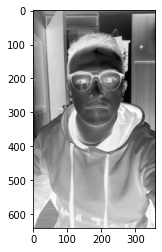

In [49]:
nico_resize_copy = grayScale_lumaNico.copy()

nico_resize_complement = np.ones(size)- nico_resize_copy
plt.imshow(nico_resize_complement, cmap='gray');

(d) Una el complemento de su imagen en escala de grises con la imagen original en escala de grises. ¿Resulta en la imagen original?

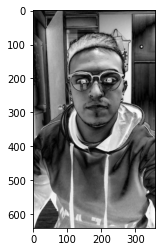

In [50]:
union_complement_original = np.maximum(nico_resize_complement, grayScale_lumaNico)
plt.imshow(union_complement_original, cmap='gray');

### (5)
Sin utilizar técnicas avanzadas (puede usar operaciones lógicas para umbralizar), extraiga el rostro y las orejas de la oveja Shaun sin los ojos. Debe visualizar una imagen a color, colocando en blanco lo que no sea el rostro y las orejas (sin los ojos) y el resto en su color original. 

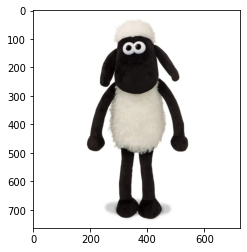

In [51]:
filename = "shaun.jpg"
shaun = io.imread(filename)

plt.imshow(shaun);

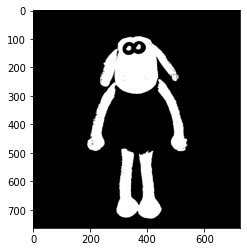

In [52]:
shaun_gray = grayScale_luma(shaun.copy())

mask2 = shaun_gray < 40

shaun_mask2 = skimage.util.img_as_float(mask2)

plt.imshow(shaun_mask2, cmap='gray')

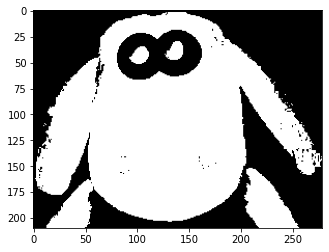

In [53]:
shaun_face = shaun_mask2[90:300,233:512]
plt.imshow(shaun_face, cmap='gray')

### (6)
Implementar la conversión de una imagen RGB al espacio HSV (Hue, Saturation, Value)

Hasta ahora nos hemos centrado en imágenes RGB y en escala de grises. Pero también hay otros espacios de colores con los que es posible que deseemos trabajar. Como [HSV](https://en.wikipedia.org/wiki/HSL_and_HSV). Convertiremos del espacio de color cúbico de RGB al cilindrico del tono, saturación y valor:

![Conversión RGB HSV](figs/convert.png)

[Hue](https://en.wikipedia.org/wiki/Hue) se puede considerar como el color base de un píxel. [Saturation](https://en.wikipedia.org/wiki/Colorfulness#Saturation) es la intensidad del color en comparación con el blanco (el color menos saturado). El [Value](https://en.wikipedia.org/wiki/Lightness) es la percepción del brillo de un píxel en comparación con el negro. Puede probar esta [demostración](http://math.hws.edu/graphicsbook/demos/c2/rgb-hsv.html) para tener una mejor idea de las diferencias entre estos dos espacios de color. Para una interpretación geométrica de lo que realiza esta transformación:

![RGB a geometría HSV](figs/rgbtohsv.png)

El componente más fácil de calcular es el value, es solo el más grande de los 3 componentes RGB: $$V = máximo (R, G, B)$$
A continuación, podemos calcular la saturación. Esta es una medida de cuánto color hay en el píxel en comparación con el blanco / gris neutro. Los colores neutros tienen la misma cantidad de cada tres componentes de color, por lo que para calcular la saturación vemos qué tan lejos está el color de ser uniforme en cada componente. Primero encontramos el valor mínimo $$m = mínimo (R, G, B)$$
Luego vemos qué tan separados están el mínimo y el máximo: $$C = V - m$$
y la Saturación será la relación entre la diferencia y qué tan grande es el máximo: $S = C / V$. Excepto si R, G y B son todos 0. Porque entonces V sería 0 y no queremos dividir por eso, así que simplemente debemos establecer la saturación en 0 si ese es el caso.

Finalmente, para calcular el Hue (tono), queremos calcular qué tan lejos alrededor del hexágono de color está nuestro color objetivo.

![color hexadecimal](figs/hex.png)

Empezamos a contar en el rojo. Cada paso hasta un punto del hexágono cuenta como 1 unidad de distancia. La distancia entre puntos viene dada por las proporciones relativas de los colores secundarios. Podemos usar la siguiente fórmula:

<img src="figs/eq.svg" width="256">

No hay un tono "correcto" si $C = 0$ porque todos los canales son iguales, por lo que el color es un tono gris, justo en el centro del cilindro. Sin embargo, por ahora establezca $H = 0$ si $C = 0$ para simplificar.

Observe que vamos a tener $H =[0,1)$ y debería circular alrededor si se vuelve demasiado grande o se vuelve negativo. Por lo tanto, verificamos si es negativo y agregamos uno si lo es. Esto es ligeramente diferente a otros métodos donde H está entre 0 y 6 o 0 y 360. Almacenaremos los componentes H, S y V en la misma imagen, así que simplemente reemplace el canal R con H, el canal G con S, etc. ¡Tenga cuidado con la división por cero al calcular la saturación!

Cree una función que convierta una imagen de RGB a HSV.  Dado que esta transformación se realiza por píxel, puede iterar sobre cada píxel y convertirlos.

Aplique esta función a su imagen (reescalada) y grafique cada componente H,S,V por aparte.

In [54]:
def RGBtoHSV(img):
    row, col, dim = img.shape
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    
    img_hsv = np.zeros((row, col, dim))
    S = np.zeros((row, col))
    H_p = np.zeros((row, col))
    H = np.zeros((row, col))

    # Calculamos V
    V = np.maximum(R,np.maximum(G,B))

    # Calculamos S
    m = np.minimum(R,np.minimum(G,B))
    C = V - m

    for x in range(row):
      for y in range(col):

        if V[x,y] == 0:
            S[x,y] = 0
        else:
            S[x,y] = C[x,y]/V[x,y]
    
    # Calculamos H
        if C[x,y] == 0:
            H_p[x,y] = 0
        elif V[x,y] == R[x,y]:
            H_p[x,y] = (G[x,y]-B[x,y])/C[x,y]
        elif V[x,y] == G[x,y]:
            H_p[x,y] = (B[x,y]-R[x,y])/C[x,y] + 2
        elif V[x,y] == B[x,y]:
            H_p[x,y] = (R[x,y]-G[x,y])/C[x,y] + 4

            
        if H_p[x,y] < 0:
            H[x,y] = (H_p[x,y]/6) + 1
        else:
            H[x,y] = H_p[x,y]/6
        
        img_hsv[x,y,0] = H[x,y]
        img_hsv[x,y,1] = S[x,y]
        img_hsv[x,y,2] = V[x,y]
    
    return img_hsv

In [55]:
nico_resize_hsv = nico_resize.copy()
nico_resize_hsv = skimage.util.img_as_float(nico_resize_hsv)
nico_resize_hsv = RGBtoHSV(nico_resize_hsv)

H = nico_resize_hsv[:,:,0]
S = nico_resize_hsv[:,:,1]
V = nico_resize_hsv[:,:,2]

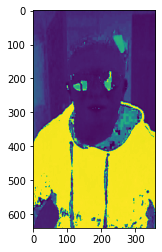

In [56]:
plt.imshow(H)

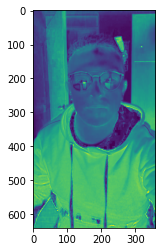

In [57]:
plt.imshow(S)

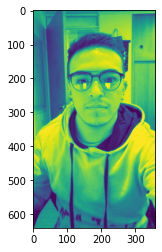

In [58]:
plt.imshow(V)

### (7) 
Probando el modulo de `skimage.color` 

(a) Realice una conversión de su imagen RGB al espacio HSV usando `skimage.color.rgb2hsv`. Sustituya la componente de saturación por su media y reconvierta a RGB (usando hsv2rgb). Visualice el resultado.

(b) Realice procedimientos similares a (a) (eliminando, cambiando o sustituyendo componentes y reconvirtiendo a RGB) para tres espacios de color de su elección (diferentes a los usados anteriormente), por ejemplo, xyz, ycbcr, lab, yuv, hed, etc. No olvide graficar cada componente de color por separado, antes del procedimiento.

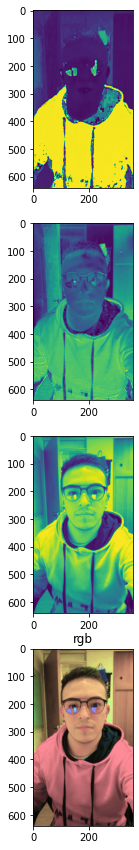

In [59]:
nico_resize_hsv_ski = nico_resize.copy()
nico_resize_hsv_ski = skimage.color.rgb2hsv(nico_resize_hsv_ski)

H = nico_resize_hsv_ski[:,:,0]
S = nico_resize_hsv_ski[:,:,1]
V = nico_resize_hsv_ski[:,:,2]

fig, axs = plt.subplots(4, figsize = (15,15))
axs[0].imshow(H)
axs[1].imshow(S)
axs[2].imshow(V)
nico_resize_hsv_ski[:,:,1] = np.mean(S)
nico_resize_hsv_ski_rgb = skimage.color.hsv2rgb(nico_resize_hsv_ski)
axs[3].imshow(nico_resize_hsv_ski_rgb)
axs[3].set_title('rgb');

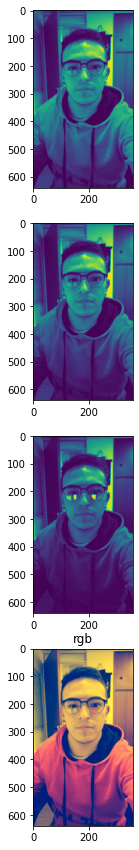

In [60]:
#xyz
nico_resize_xyz = nico_resize.copy()
nico_resize_xyz = skimage.color.rgb2xyz(nico_resize_xyz)

X = nico_resize_xyz[:,:,0]
Y = nico_resize_xyz[:,:,1]
Z = nico_resize_xyz[:,:,2]

fig, axs = plt.subplots(4, figsize = (15,15))
axs[0].imshow(X)
axs[1].imshow(Y)
axs[2].imshow(Z)
nico_resize_xyz[:,:,2] = np.std(Z)
nico_resize_rgb = skimage.color.xyz2rgb(nico_resize_xyz)
axs[3].imshow(nico_resize_rgb)
axs[3].set_title('rgb');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


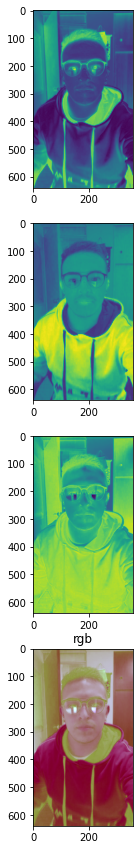

In [61]:
#hed
nico_resize_hed = nico_resize.copy()
nico_resize_hed = skimage.color.rgb2hed(nico_resize_hed)

H = nico_resize_hed[:,:,0]
E = nico_resize_hed[:,:,1]
D = nico_resize_hed[:,:,2]

fig, axs = plt.subplots(4, figsize = (15,15))
axs[0].imshow(H)
axs[1].imshow(E)
axs[2].imshow(D)
nico_resize_hed[:,:,0] = np.mean(H)
nico_resize_rgb = skimage.color.hed2rgb(nico_resize_hed)
axs[3].imshow(nico_resize_rgb)
axs[3].set_title('rgb');

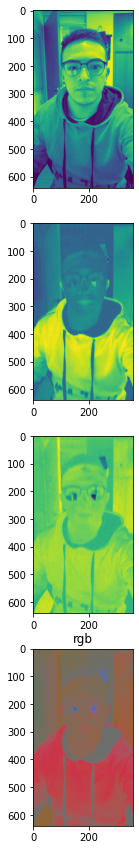

In [62]:
#lab
nico_resize_lab = nico_resize.copy()
nico_resize_lab = skimage.color.rgb2lab(nico_resize_lab)

L = nico_resize_lab[:,:,0]
A = nico_resize_lab[:,:,1]
B = nico_resize_lab[:,:,2]

fig, axs = plt.subplots(4, figsize = (15,15))
axs[0].imshow(L)
axs[1].imshow(A)
axs[2].imshow(B)
nico_resize_lab[:,:,0] = np.mean(L)
nico_resize_rgb = skimage.color.lab2rgb(nico_resize_lab)
axs[3].imshow(nico_resize_rgb)
axs[3].set_title('rgb');

### (8)
En `skimage` se pueden realizar transformaciones geométricas definiendo la transformación mediante la clase `skimage.transform.AffineTransform` y realizando la transformación con  `skimage.transform.warp(imagen, transformacion)`.

Realice las siguientes transformaciones (vistas en clase) sobre su imagen definiendo la matriz Affine (A) de transformación (revisar diapositivas de la tercera sesión). Visualice cada transformación.

(a) Identidad

(b) Escalamiento y reflexión

(c) Rotación

(d) Traslación

(e) Shear (vertical)

(f) Shear (horizontal)

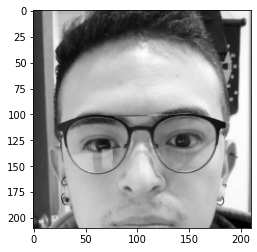

In [63]:
from skimage.transform import AffineTransform, warp

#Identidad
nico_cut = grayScale_lumaNico[80:290, 80:290]

A = AffineTransform()
nico_identity = warp(nico_cut, A)

plt.imshow(nico_identity, cmap = 'gray');

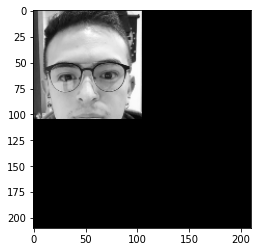

In [64]:
#reescalar
A = AffineTransform(scale = (2,2))
nico_identity = warp(nico_cut, A)

plt.imshow(nico_identity, cmap = 'gray');

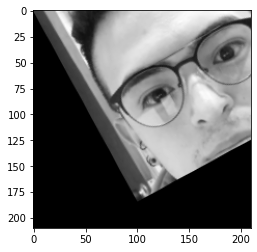

In [65]:
#Rotacion
A = AffineTransform(rotation = 0.5)
nico_identity = warp(nico_cut, A)

plt.imshow(nico_identity, cmap = 'gray');

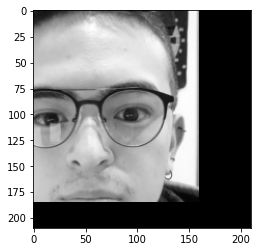

In [66]:
#Traslacion
A = AffineTransform(translation = (50,25))
nico_identity = warp(nico_cut, A)

plt.imshow(nico_identity, cmap = 'gray');

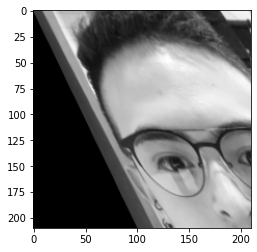

In [67]:
#Shear Vertical
A = AffineTransform(shear = 0.5)
nico_identity = warp(nico_cut, A)

plt.imshow(nico_identity, cmap = 'gray');

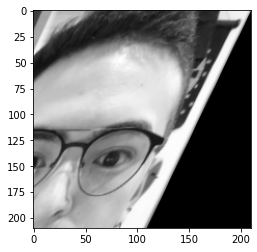

In [68]:
#Shear Horizontal
A = AffineTransform(shear = -0.5)
nico_identity = warp(nico_cut, A)

plt.imshow(nico_identity, cmap = 'gray');